<a href="https://colab.research.google.com/github/Kem98m/Computer-Vision-Sampler/blob/main/homework06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 527 Homework 6

### Problem 0 (3 points)

Pratik Mulpury, Kenneth Marenco

## Part 1: Image Motion Basics 

### Problem 1.1 (Exam Style)

The normal component of the image field is 
$$ v(x) = || \nabla e(x)||^{-1} [\nabla e(x)]^T v_{vector}(x)$$ 
$$ ||\nabla e(x)||^{-1} = \frac{1}{\sqrt{3^2 + 4^2}} = \frac{1}{5} $$
$$ \nabla e(x)^T = [3,  4]$$
$$ v_{vector}(x) = [1, 3]^T $$

which means
$$ v(x) = || \nabla e(x)||^{-1} [\nabla e(x)]^T v_{vector}(x) = 3$$ pixels per frame

### Problem 1.2 (Exam Style)

Assuming the constant appearance of the object leads to the BCCE equation which can create a system of linear equations.

$$ x_1: [1, 1] v_1 - 5 = 0$$


$$ x_2: [-1, 1] v_2 + 1 = 0$$

which after solving gives 

$$ v = [3, 2]^T$$


## Part 2: Window Tracking 

### Problem 2.1 (Exam Style)

The matrix A is created to using the information provided to create

\begin{bmatrix}
(\frac{\partial g}{\partial x_1})^2 & \frac{\partial g}{\partial x_1} \frac{\partial g}{\partial x_2} \\
\frac{\partial g}{\partial x_1} \frac{\partial g}{\partial x_2} & (\frac{\partial g}{\partial x_2})^2
\end{bmatrix}

 which expands to
 \begin{bmatrix}
 60 & 32& 44& 90& 48&
66 \\
 68 &28& 44& 102& 42&
66 \\
 52 & 28& 32& 78& 42&
48 \\
 90 & 48& 66& 135& 72&
99 \\
 102 & 42& 66& 153& 63&
99 \\
 78 & 42& 48& 117& 63&
72 
 \end{bmatrix}

 vector b is expanded into

\begin{bmatrix}
 60 & 30& 20\\
 30 &40& 20\\
 60 & 10& 40\\
 90 & 45& 30\\
 45 & 60& 30\\
 90 & 15& 60
\end{bmatrix}

### Problem 2.2 (Exam Style)

The feature at $x_f$ suffers from the aperture problem because when the image gradient is non-zero the component orthogonal is not observable.

### Problem 2.3

### Problem 2.4

## Part 3: The Lucas-Kanade Tracker

### Problem 3.1

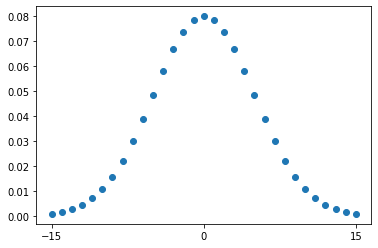

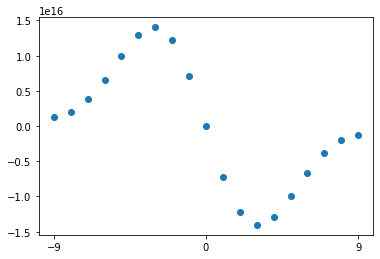

In [ ]:
import autograd.numpy as np
from autograd import grad
from matplotlib import pyplot as plt
def f1(x,sigma):
    return np.exp(-(x/sigma) ** 2 / 2.)

def g1(x,sigma):
    out = np.exp(-(x/sigma) ** 2 / 2.)
    return np.gradient(out)

def averaging_kernel(sigma):
  h = np.ceil(3*sigma)
  h = np.int64(h)
  n = 2*h+1
  x = np.linspace(-h,h,n)
  out = f1(x,sigma)
  return out/np.sum(out),x


def differentiation_kernel(sigma):
  h = np.ceil(3*sigma)
  h = np.int64(h)
  n = 2*h+1
  x = np.linspace(-h,h,n)
  out = g1(x,sigma)
  return out/np.sum(out),x
  
avg_kernel,x1 = averaging_kernel(5)
dif_kernel,x2 = differentiation_kernel(3)

plt.figure()
plt.xticks((-15,0,15))
plt.scatter(x1,avg_kernel)
plt.figure()
plt.xticks((-9,0,9))
plt.scatter(x2,dif_kernel)


### Problem 3.2

In [ ]:
import urllib.request
import pickle
from os import path as osp
import scipy

pickle_file_name = 'inputs.pkl'
if not osp.exists(pickle_file_name):
    fmt = 'https://www2.cs.duke.edu/courses/spring21/compsci527/homework/6/{}'
    url = fmt.format(pickle_file_name)
    urllib.request.urlretrieve(url, pickle_file_name)
with open(pickle_file_name, 'rb') as file:
    inputs = pickle.load(file)
f, g = inputs['f'], inputs['g']

windowparam =1.5
differentiationparam =1
delta = 10**-3
epsilon = 10**-6
rho = 10
maxiter = 30
centers = np.arange(3,98)
interpfunc = scipy.interpolate.interp1d(centers,f[3:98],kind="linear",fill_value="extrapolate")
interpfunc2 = scipy.interpolate.interp1d(centers,g[3:98],kind="linear",fill_value="extrapolate")

def lucas_kanade(f,g,xf,d0,delta,epsilon,rho):
  w, X = averaging_kernel(windowparam)
  diff, X = differentiation_kernel(1)
  X=X+xf
  i = interpfunc(X)
  lucas_kandade_iter(0,0,0,X,w,xf,diff)

def lucas_kandade_iter(d0,s,t,X,w,xf,diff,f,g):
  done = False
  lost = False
  d = d0
  while not done or lost:
    t+=1
    X = X+s
    j = interpfunc2(X)
    G = scipy.signal.convolve(j,diff,mode="same")

    cumsum = 0
    for i in range(len(G)):
      cumsum = cumsum+((G(i)**2) *(w(i)))
    A = cumsum

    cumsum = 0
    for i in range(len(G)):
      cumsum = cumsum+(G(i)**2)*np.floor(f(i+xf)-g(i+xf))*w(i)

    b = cumsum
    s = b/a
    dold =d
    d+=s
    done = (np.abs(s) < delta) or 
    lost = (np.abs(d-d0) > rho) or

  return d

for center in centers:
  lucas_kanade(f,g,center,0,delta,epsilon,rho)


SyntaxError: ignored